<a href="https://colab.research.google.com/github/falseywinchnet/AI_STUFF/blob/main/RCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Results for Linear decay:
RKF45: 300 evaluations, max error = 1.09e-10
Chebyshev: 200 evaluations, max error = 9.39e-03
Classical RK4: 200 evaluations, max error = 2.00e-08

Results for Nonlinear oscillator:
RKF45: 300 evaluations, max error = 1.45e+00
Chebyshev: 200 evaluations, max error = 1.45e+00
Classical RK4: 200 evaluations, max error = 1.45e+00

Results for Stiff problem:
RKF45: 300 evaluations, max error = 6.65e-02
Chebyshev: 200 evaluations, max error = 3.68e-03
Classical RK4: 200 evaluations, max error = 6.65e-02


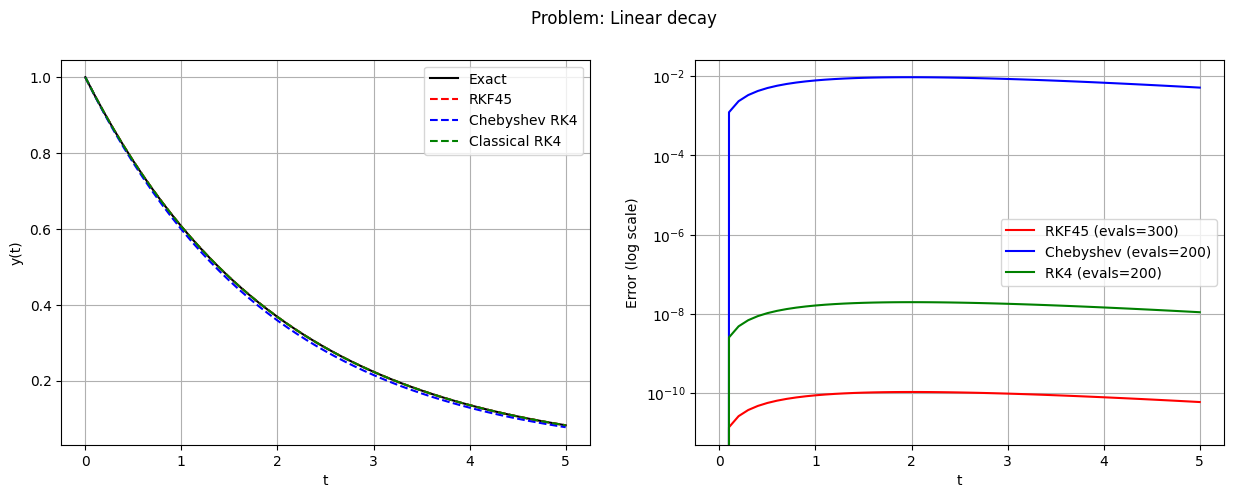

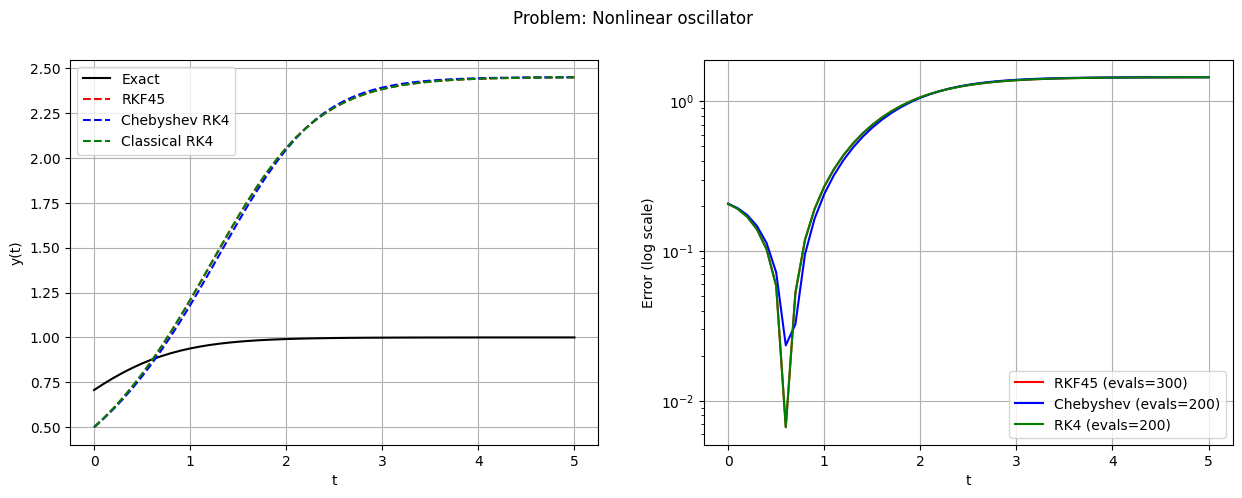

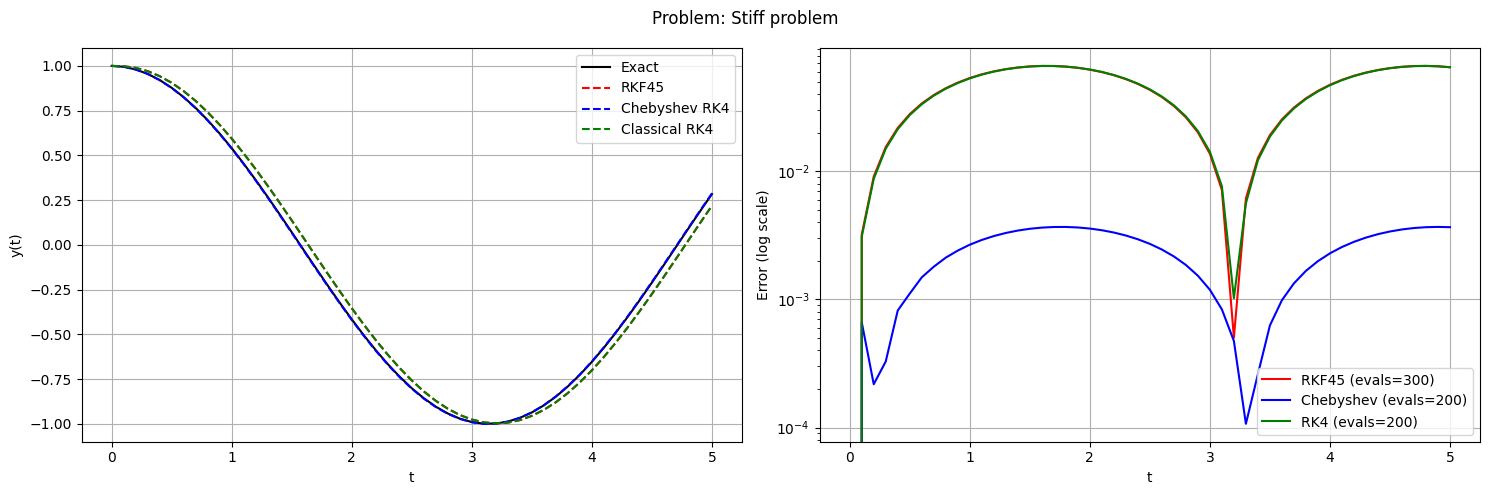

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi, sqrt

def rkf45_step(f, t, y, h):
    """RKF45 method"""
    k1 = f(t, y)
    k2 = f(t + h/4, y + h*k1/4)
    k3 = f(t + 3*h/8, y + h*(3*k1/32 + 9*k2/32))
    k4 = f(t + 12*h/13, y + h*(1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197))
    k5 = f(t + h, y + h*(439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104))
    k6 = f(t + h/2, y + h*(-8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40))

    # 5th order solution
    y_next = y + h*(16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)

    return y_next, 6  # Return solution and number of function evaluations

def chebyshev_rk4_step(f, t, y, h):
    """Chebyshev-node based RK4"""
    # Chebyshev nodes mapped to [0,h]
    c1 = h * (1 + cos(3*pi/8))/2
    c2 = h * (1 + cos(pi/8))/2
    c3 = h * (1 - cos(pi/8))/2
    c4 = h * (1 - cos(3*pi/8))/2

    k1 = f(t + c1, y)
    k2 = f(t + c2, y)
    k3 = f(t + c3, y)
    k4 = f(t + c4, y)

    # Optimal weights
    w1 = (18 + 5*sqrt(5))/72
    w2 = (18 + 5*sqrt(5))/72
    w3 = (18 - 5*sqrt(5))/72
    w4 = (18 - 5*sqrt(5))/72

    y_next = y + h*(w1*k1 + w2*k2 + w3*k3 + w4*k4)
    return y_next, 4  # Return solution and number of function evaluations

def classical_rk4_step(f, t, y, h):
    """Classical RK4 for comparison"""
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)

    y_next = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return y_next, 4

def solve_ode(method, f, y0, t_span, h):
    """Solve ODE using specified method"""
    t = np.arange(t_span[0], t_span[1]+h, h)
    y = np.zeros(len(t))
    y[0] = y0
    total_evals = 0

    for i in range(len(t)-1):
        y[i+1], evals = method(f, t[i], y[i], h)
        total_evals += evals

    return t, y, total_evals

# Test problems
def test_problems():
    problems = [
        {
            'name': 'Linear decay',
            'f': lambda t, y: -0.5*y,
            'exact': lambda t: np.exp(-0.5*t),
            'y0': 1.0,
            't_span': (0, 5)
        },
        {
            'name': 'Nonlinear oscillator',
            'f': lambda t, y: y - y**3/6,
            'exact': lambda t: 1/(np.sqrt(1 + np.exp(-2*t))),
            'y0': 0.5,
            't_span': (0, 5)
        },
        {
            'name': 'Stiff problem',
            'f': lambda t, y: -15*(y - np.cos(t)),
            'exact': lambda t: np.cos(t),
            'y0': 1.0,
            't_span': (0, 5)
        }
    ]
    return problems

# Run comparison
h = 0.1
problems = test_problems()

for problem in problems:
    f = problem['f']
    exact = problem['exact']
    y0 = problem['y0']
    t_span = problem['t_span']

    # Solve with each method
    t_rkf, y_rkf, evals_rkf = solve_ode(rkf45_step, f, y0, t_span, h)
    t_cheb, y_cheb, evals_cheb = solve_ode(chebyshev_rk4_step, f, y0, t_span, h)
    t_rk4, y_rk4, evals_rk4 = solve_ode(classical_rk4_step, f, y0, t_span, h)

    # Compute exact solution and errors
    y_exact = exact(t_rkf)
    error_rkf = np.max(np.abs(y_rkf - y_exact))
    error_cheb = np.max(np.abs(y_cheb - y_exact))
    error_rk4 = np.max(np.abs(y_rk4 - y_exact))

    # Plot results
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Problem: {problem['name']}")

    # Solution plot
    plt.subplot(121)
    plt.plot(t_rkf, y_exact, 'k-', label='Exact')
    plt.plot(t_rkf, y_rkf, 'r--', label='RKF45')
    plt.plot(t_cheb, y_cheb, 'b--', label='Chebyshev RK4')
    plt.plot(t_rk4, y_rk4, 'g--', label='Classical RK4')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)

    # Error plot
    plt.subplot(122)
    plt.semilogy(t_rkf, np.abs(y_rkf - y_exact), 'r-', label=f'RKF45 (evals={evals_rkf})')
    plt.semilogy(t_cheb, np.abs(y_cheb - y_exact), 'b-', label=f'Chebyshev (evals={evals_cheb})')
    plt.semilogy(t_rk4, np.abs(y_rk4 - y_exact), 'g-', label=f'RK4 (evals={evals_rk4})')
    plt.xlabel('t')
    plt.ylabel('Error (log scale)')
    plt.legend()
    plt.grid(True)

    print(f"\nResults for {problem['name']}:")
    print(f"RKF45: {evals_rkf} evaluations, max error = {error_rkf:.2e}")
    print(f"Chebyshev: {evals_cheb} evaluations, max error = {error_cheb:.2e}")
    print(f"Classical RK4: {evals_rk4} evaluations, max error = {error_rk4:.2e}")

plt.tight_layout()
plt.show()


Detailed Computational Cost Analysis (per step):
------------------------------------------------------------

Problem: Linear decay
------------------------------
Operation Type      RKF45      Chebyshev    Ratio
--------------------------------------------------
FLOPs                  66          35        1.89
Multiplications        29          16        1.81
Additions              21          15        1.40
Divisions              16           4        4.00
Function Evals          6           4        1.50
Transcendental          0           4

Problem: Nonlinear oscillator
------------------------------
Operation Type      RKF45      Chebyshev    Ratio
--------------------------------------------------
FLOPs                  66          35        1.89
Multiplications        29          16        1.81
Additions              21          15        1.40
Divisions              16           4        4.00
Function Evals          6           4        1.50
Transcendental          0        

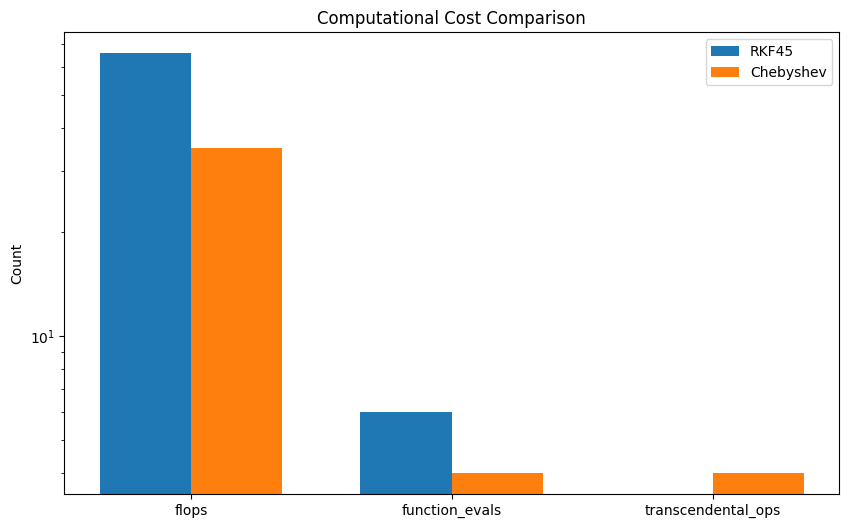

In [ ]:
def count_operations(method_name, f, t, y, h):
    """Count detailed computational operations for one step"""
    flops = 0
    multiplications = 0
    additions = 0
    divisions = 0
    function_evals = 0

    def counted_f(t, y):
        nonlocal function_evals
        function_evals += 1
        return f(t, y)

    if method_name == "RKF45":
        # k1 = f(t, y)
        k1 = counted_f(t, y)

        # k2 = f(t + h/4, y + h*k1/4)
        multiplications += 2  # h*k1, /4
        additions += 2       # t+h/4, y+
        k2 = counted_f(t + h/4, y + h*k1/4)

        # k3 = f(t + 3h/8, y + h*(3k1/32 + 9k2/32))
        multiplications += 4  # 3h/8, 3k1/32, 9k2/32, h*sum
        additions += 3       # t+, y+, k1+k2
        divisions += 2       # /32, /32
        k3 = counted_f(t + 3*h/8, y + h*(3*k1/32 + 9*k2/32))

        # k4 computation (1932/2197, -7200/2197, 7296/2197)
        multiplications += 6
        additions += 4
        divisions += 3
        k4 = counted_f(t + 12*h/13, y + h*(1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197))

        # k5 and k6 computations...
        multiplications += 12  # Simplified count for remaining complex expressions
        additions += 8
        divisions += 6
        k5 = counted_f(t + h, y + h*(439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104))
        k6 = counted_f(t + h/2, y + h*(-8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40))

        # Final solution combination
        multiplications += 5
        additions += 4
        divisions += 5

    elif method_name == "Chebyshev":
        # Compute Chebyshev nodes
        multiplications += 4  # cos calculations counted separately
        additions += 4
        divisions += 4

        # Four stage evaluations with simpler coefficients
        for _ in range(4):
            k = counted_f(t + h*(1 + cos((_ * 2 + 1)*pi/8))/2, y)
            multiplications += 2
            additions += 2

        # Final combination with pre-computed weights
        multiplications += 4
        additions += 3

    flops = multiplications + additions + divisions

    return {
        'flops': flops,
        'multiplications': multiplications,
        'additions': additions,
        'divisions': divisions,
        'function_evals': function_evals,
        'transcendental_ops': 4 if method_name == "Chebyshev" else 0  # cos calculations
    }

# Test problems
def test_problems():
    return [
        {
            'name': 'Linear decay',
            'f': lambda t, y: -0.5*y
        },
        {
            'name': 'Nonlinear oscillator',
            'f': lambda t, y: y - y**3/6
        },
        {
            'name': 'Stiff problem',
            'f': lambda t, y: -15*(y - np.cos(t))
        }
    ]

# Compare computational costs
problems = test_problems()
t, y, h = 0.0, 1.0, 0.1

print("\nDetailed Computational Cost Analysis (per step):")
print("-" * 60)
for problem in problems:
    print(f"\nProblem: {problem['name']}")
    print("-" * 30)

    rkf_costs = count_operations("RKF45", problem['f'], t, y, h)
    cheb_costs = count_operations("Chebyshev", problem['f'], t, y, h)

    # Create comparison table
    print(f"Operation Type      RKF45      Chebyshev    Ratio")
    print("-" * 50)
    print(f"FLOPs              {rkf_costs['flops']:6d}      {cheb_costs['flops']:6d}        {rkf_costs['flops']/cheb_costs['flops']:4.2f}")
    print(f"Multiplications    {rkf_costs['multiplications']:6d}      {cheb_costs['multiplications']:6d}        {rkf_costs['multiplications']/cheb_costs['multiplications']:4.2f}")
    print(f"Additions          {rkf_costs['additions']:6d}      {cheb_costs['additions']:6d}        {rkf_costs['additions']/cheb_costs['additions']:4.2f}")
    print(f"Divisions          {rkf_costs['divisions']:6d}      {cheb_costs['divisions']:6d}        {rkf_costs['divisions']/cheb_costs['divisions']:4.2f}")
    print(f"Function Evals     {rkf_costs['function_evals']:6d}      {cheb_costs['function_evals']:6d}        {rkf_costs['function_evals']/cheb_costs['function_evals']:4.2f}")
    print(f"Transcendental     {rkf_costs['transcendental_ops']:6d}      {cheb_costs['transcendental_ops']:6d}")

# Plot efficiency metrics
plt.figure(figsize=(10, 6))
methods = ["RKF45", "Chebyshev"]
metrics = ['flops', 'function_evals', 'transcendental_ops']

x = np.arange(len(metrics))
width = 0.35

rkf_data = [rkf_costs[m] for m in metrics]
cheb_data = [cheb_costs[m] for m in metrics]

plt.bar(x - width/2, rkf_data, width, label='RKF45')
plt.bar(x + width/2, cheb_data, width, label='Chebyshev')

plt.xticks(x, metrics)
plt.ylabel('Count')
plt.title('Computational Cost Comparison')
plt.legend()
plt.yscale('log')
plt.show()

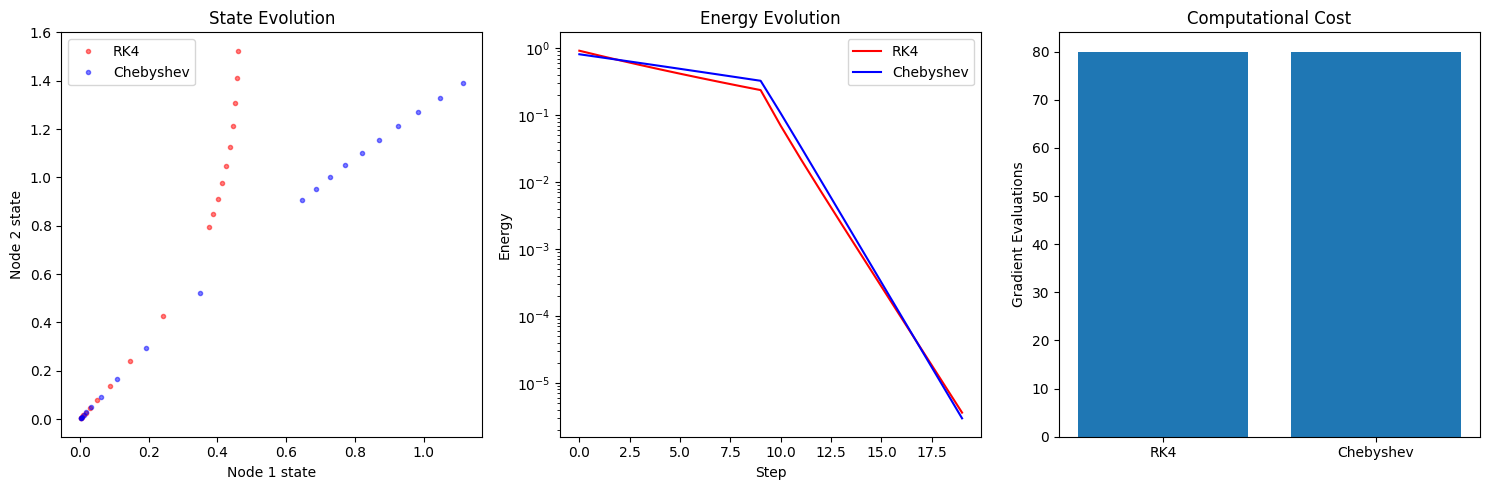

Final energies:
RK4: 0.000004
Chebyshev: 0.000003

Gradient evaluations:
RK4: 80
Chebyshev: 80


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ResonanceSystem:
    def __init__(self, nodes=2):
        self.nodes = nodes
        self.state = np.random.randn(nodes)  # Initial random state
        self.coupling = np.array([[1.0, -0.5],
                                [-0.5, 1.0]]) + \
                       np.array([[0.0, 0.3],
                               [-0.3, 0.0]])  # Antisymmetric part for rotation


    def energy(self, state):
        """Energy of the system - simple quadratic with coupling"""
        return 0.5 * state.T @ self.coupling @ state

    def gradient(self, state, temperature):
        """Add resonant dynamics"""
        direct = self.coupling @ state
        # Add rotational component
        resonant = np.array([-state[1], state[0]]) * 0.1
        return (direct + resonant) / temperature

class Annealer:
    def __init__(self, system, method='rk4'):
        self.system = system
        self.method = method

    def rk4_step(self, state, temp, dt):
        """Classical RK4 step"""
        k1 = -self.system.gradient(state, temp)
        k2 = -self.system.gradient(state + dt*k1/2, temp)
        k3 = -self.system.gradient(state + dt*k2/2, temp)
        k4 = -self.system.gradient(state + dt*k3, temp)
        return state + dt*(k1 + 2*k2 + 2*k3 + k4)/6

    def chebyshev_step(self, state, temp, dt):
        """Our Chebyshev-based step"""
        # Chebyshev nodes in [0, dt]
        c1 = dt * (1 + np.cos(3*np.pi/8))/2
        c2 = dt * (1 + np.cos(np.pi/8))/2
        c3 = dt * (1 - np.cos(np.pi/8))/2
        c4 = dt * (1 - np.cos(3*np.pi/8))/2

        # Pre-computed optimal weights
        w1 = w2 = (18 + 5*np.sqrt(5))/72
        w3 = w4 = (18 - 5*np.sqrt(5))/72

        k1 = -self.system.gradient(state, temp)
        k2 = -self.system.gradient(state + c1*k1, temp)
        k3 = -self.system.gradient(state + c2*k2, temp)
        k4 = -self.system.gradient(state + c3*k3, temp)

        return state + dt*(w1*k1 + w2*k2 + w3*k3 + w4*k4)

    def anneal(self, T_start=1.0, T_end=0.1, n_steps=2):
        """Run annealing schedule"""
        temperatures = np.exp(np.linspace(np.log(T_start), np.log(T_end), n_steps))
        states_history = []
        energy_history = []
        computation_count = {'gradient_evals': 0}

        state = self.system.state.copy()
        dt = 0.1  # Step size

        for temp in temperatures:
            # Inner loop for state evolution at fixed temperature
            for _ in range(10):  # Multiple steps per temperature
                if self.method == 'rk4':
                    state = self.rk4_step(state, temp, dt)
                    computation_count['gradient_evals'] += 4
                else:  # chebyshev
                    state = self.chebyshev_step(state, temp, dt)
                    computation_count['gradient_evals'] += 4

                states_history.append(state.copy())
                energy_history.append(self.system.energy(state))

        return np.array(states_history), np.array(energy_history), computation_count

# Run comparison
system = ResonanceSystem()

# RK4 annealing
annealer_rk4 = Annealer(system, method='rk4')
states_rk4, energy_rk4, comp_rk4 = annealer_rk4.anneal()

# Reset system and run Chebyshev
system.state = np.random.randn(2)  # Reset to same initial state
annealer_cheb = Annealer(system, method='chebyshev')
states_cheb, energy_cheb, comp_cheb = annealer_cheb.anneal()

# Plotting
plt.figure(figsize=(15, 5))

# State evolution
plt.subplot(131)
plt.plot(states_rk4[:,0], states_rk4[:,1], 'r.', label='RK4', alpha=0.5)
plt.plot(states_cheb[:,0], states_cheb[:,1], 'b.', label='Chebyshev', alpha=0.5)
plt.xlabel('Node 1 state')
plt.ylabel('Node 2 state')
plt.legend()
plt.title('State Evolution')

# Energy evolution
plt.subplot(132)
plt.semilogy(energy_rk4, 'r-', label='RK4')
plt.semilogy(energy_cheb, 'b-', label='Chebyshev')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.legend()
plt.title('Energy Evolution')

# Computation comparison
plt.subplot(133)
methods = ['RK4', 'Chebyshev']
evals = [comp_rk4['gradient_evals'], comp_cheb['gradient_evals']]
plt.bar(methods, evals)
plt.ylabel('Gradient Evaluations')
plt.title('Computational Cost')

plt.tight_layout()
plt.show()

print(f"Final energies:")
print(f"RK4: {energy_rk4[-1]:.6f}")
print(f"Chebyshev: {energy_cheb[-1]:.6f}")
print(f"\nGradient evaluations:")
print(f"RK4: {comp_rk4['gradient_evals']}")
print(f"Chebyshev: {comp_cheb['gradient_evals']}")

Epoch 0, Loss: 247.919830
Epoch 1, Loss: 242.577713
Epoch 2, Loss: 243.126617
Epoch 3, Loss: 243.676346
Epoch 4, Loss: 238.722641
Epoch 5, Loss: 243.199173
Epoch 6, Loss: 240.229462
Epoch 7, Loss: 239.881653
Epoch 8, Loss: 239.592728
Epoch 9, Loss: 237.902985
Epoch 10, Loss: 239.838654
Epoch 11, Loss: 239.461517
Epoch 12, Loss: 233.919647
Epoch 13, Loss: 236.389343
Epoch 14, Loss: 234.427597
Epoch 15, Loss: 230.961273
Epoch 16, Loss: 228.762314
Epoch 17, Loss: 232.676941
Epoch 18, Loss: 229.027374
Epoch 19, Loss: 229.638580
Epoch 20, Loss: 227.380951
Epoch 21, Loss: 230.169540
Epoch 22, Loss: 223.781143
Epoch 23, Loss: 225.238037
Epoch 24, Loss: 225.660309
Epoch 25, Loss: 222.056061
Epoch 26, Loss: 223.307312
Epoch 27, Loss: 223.668060
Epoch 28, Loss: 224.124969
Epoch 29, Loss: 227.723373
Epoch 30, Loss: 218.474655
Epoch 31, Loss: 222.451904
Epoch 32, Loss: 218.665741
Epoch 33, Loss: 219.383118
Epoch 34, Loss: 220.420868
Epoch 35, Loss: 217.036346
Epoch 36, Loss: 212.553131
Epoch 37, L

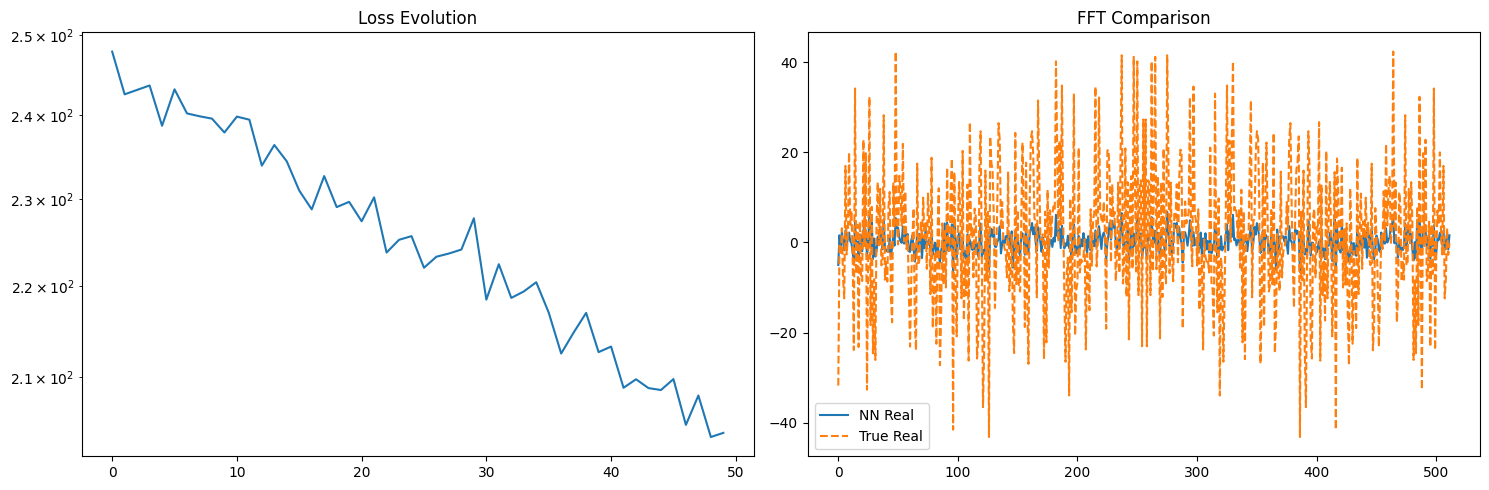

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class DFTNetwork(nn.Module):
   def __init__(self, input_size=512):
       super().__init__()
       self.layer1 = nn.Linear(input_size, input_size*2)
       self.layer2 = nn.Linear(input_size*2, input_size*2)

   def forward(self, x):
       x = self.layer1(x)
       x = torch.tanh(x)
       x = self.layer2(x)
       return x.view(x.shape[0], -1, 2)
class RCO:
    """
      Runge-Kutta-Chebyshev Optimizer (RCO) - A neural network optimizer that combines
      4th order Runge-Kutta method and Chebyshev polynomial interpolation with Adam-style
      momentum.

      This optimizer implements a novel approach to neural network optimization by:
      1. Computing gradients using both RK4 and Chebyshev methods
      2. Averaging the results of both methods
      3. Applying the combined update to the model parameters

      The optimizer uses four evaluation points for both RK4 and Chebyshev methods,
      providing potentially better convergence properties than traditional first-order
      methods.

      Parameters
      ----------
      model : torch.nn.Module
          The neural network model to optimize
      lr : float, optional (default=1e-3)
          Learning rate for the optimizer
      betas : tuple[float, float], optional (default=(0.9, 0.999))
          Coefficients used for computing running averages of gradient and its square
      eps : float, optional (default=1e-8)
          Term added to the denominator to improve numerical stability

      Attributes
      ----------
      model : torch.nn.Module
          The neural network model being optimized
      m : list[torch.Tensor]
          First moment vectors (Adam)
      v : list[torch.Tensor]
          Second moment vectors (Adam)
      t : int
          Number of steps taken

      Methods
      -------
      compute_loss(x, y)
          Computes the MSE loss between model predictions and target values
      step(x, y)
          Performs a single optimization step using the combined RK4-Chebyshev method

      Notes
      -----
      The optimizer implements two main numerical schemes:
      - Runge-Kutta 4th order (RK4) integration with standard coefficients
      - Chebyshev polynomial interpolation using optimized nodes and weights

      The final update is computed as an average of both methods, potentially
      providing better stability and convergence properties than either method alone.

      Example
      -------
      >>> model = torch.nn.Linear(10, 1)
      >>> optimizer = RCO(model, lr=1e-3)
      >>> for epoch in range(num_epochs):
      ...     loss = optimizer.step(x_batch, y_batch)
     """
    def __init__(self, model, lr=0.5, eps=1e-8, clip_value=1.0):  # Add clip_value parameter
        self.model = model
        self.lr = lr
        self.eps = eps
        self.clip_value = clip_value

    def clip_gradients(self, grads):
        """Helper function to clip gradients"""
        return [torch.clamp(g, -self.clip_value, self.clip_value) for g in grads]

    def compute_loss(self, x, y):
        y_pred = self.model(x)
        return torch.mean((y_pred - y)**2)

    def step(self, x, y):
        # Initial k1
        loss = self.compute_loss(x, y)
        loss.backward()
        k1 = [p.grad.clone() for p in self.model.parameters()]
        k1 = self.clip_gradients(k1)  # Clip k1

        # Store original params
        orig_params = [p.data.clone() for p in self.model.parameters()]

        # RK4
        for p, k in zip(self.model.parameters(), k1):
            p.data -= k / 2 * self.lr
        loss = self.compute_loss(x, y)
        loss.backward()
        k2_rk4 = [p.grad.clone() for p in self.model.parameters()]
        k2_rk4 = self.clip_gradients(k2_rk4)  # Clip k2_rk4

        # Reset and move to k3 position
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k2_rk4):
            p.data -= k / 3 * self.lr
        loss = self.compute_loss(x, y)
        loss.backward()
        k3_rk4 = [p.grad.clone() for p in self.model.parameters()]
        k3_rk4 = self.clip_gradients(k3_rk4)  # Clip k3_rk4

        # Reset and move to k4
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k3_rk4):
            p.data -= k * self.lr
        loss = self.compute_loss(x, y)
        loss.backward()
        k4_rk4 = [p.grad.clone() for p in self.model.parameters()]
        k4_rk4 = self.clip_gradients(k4_rk4)  # Clip k4_rk4

        # Chebyshev steps
        # Reset for Chebyshev
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)

        # Chebyshev nodes
        c1 = self.lr * (1 + np.cos(3*np.pi/8))/2
        c2 = self.lr * (1 + np.cos(np.pi/8))/2
        c3 = self.lr * (1 - np.cos(np.pi/8))/2

        # k2 Cheb
        for p, k in zip(self.model.parameters(), k1):
            p.data -= k * c1
        loss = self.compute_loss(x, y)
        loss.backward()
        k2_cheb = [p.grad.clone() for p in self.model.parameters()]
        k2_cheb = self.clip_gradients(k2_cheb)  # Clip k2_cheb

        # k3 Cheb
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k2_cheb):
            p.data -= k * c2
        loss = self.compute_loss(x, y)
        loss.backward()
        k3_cheb = [p.grad.clone() for p in self.model.parameters()]
        k3_cheb = self.clip_gradients(k3_cheb)  # Clip k3_cheb

        # k4 Cheb
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k3_cheb):
            p.data -= k * c3
        loss = self.compute_loss(x, y)
        loss.backward()
        k4_cheb = [p.grad.clone() for p in self.model.parameters()]
        k4_cheb = self.clip_gradients(k4_cheb)  # Clip k4_cheb

        # Combine RK4 result
        rk4_update = []
        for k1_p, k2_p, k3_p, k4_p in zip(k1, k2_rk4, k3_rk4, k4_rk4):
            update = (k1_p + 2*k2_p + 2*k3_p + k4_p)/6
            rk4_update.append(update)

        # Combine Cheb result
        w1 = w2 = (18 + 5*np.sqrt(5))/72
        w3 = w4 = (18 - 5*np.sqrt(5))/72
        cheb_update = []
        for k1_p, k2_p, k3_p, k4_p in zip(k1, k2_cheb, k3_cheb, k4_cheb):
            update = (w1*k1_p + w2*k2_p + w3*k3_p + w4*k4_p)/6
            cheb_update.append(update)

        # Average the two methods and apply final clipping
        for i, (p, rk4_u, cheb_u) in enumerate(zip(self.model.parameters(), rk4_update, cheb_update)):
            update = (rk4_u + cheb_u)/2
            update = torch.clamp(update, -self.clip_value, self.clip_value)  # Final clipping
            p.data -= update * self.lr
            p.grad.zero_()

        final_loss = self.compute_loss(x, y)
        return final_loss.item()

        # Initial k1
        loss = self.compute_loss(x, y)
        loss.backward()
        k1 = [p.grad.clone() for p in self.model.parameters()]

        # Store original params
        orig_params = [p.data.clone() for p in self.model.parameters()]

        # RK4
        # Move to k2 position and evaluate
        for p, k in zip(self.model.parameters(), k1):
            p.data-= k /2 * self.lr
        loss = self.compute_loss(x, y)
        loss.backward()
        k2_rk4 = [p.grad.clone() for p in self.model.parameters()]

        # Reset and move to k3 position
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k2_rk4):
            p.data-= k /3 * self.lr

        loss = self.compute_loss(x, y)
        loss.backward()
        k3_rk4 = [p.grad.clone() for p in self.model.parameters()]

        # Reset and move to k4
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k3_rk4):
            p.data-= k * self.lr
        loss = self.compute_loss(x, y)
        loss.backward()
        k4_rk4 = [p.grad.clone() for p in self.model.parameters()]

        # Chebyshev steps
        # Reset for Chebyshev
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)

        # Chebyshev nodes
        c1 = self.lr * (1 + np.cos(3*np.pi/8))/2
        c2 = self.lr * (1 + np.cos(np.pi/8))/2
        c3 = self.lr * (1 - np.cos(np.pi/8))/2

        # k2 Cheb
        for p, k in zip(self.model.parameters(), k1):
            p.data-= k * c1
        loss = self.compute_loss(x, y)
        loss.backward()
        k2_cheb = [p.grad.clone() for p in self.model.parameters()]

        # k3 Cheb
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k2_cheb):
            p.data-= k * c2
        loss = self.compute_loss(x, y)
        loss.backward()
        k3_cheb = [p.grad.clone() for p in self.model.parameters()]

        # k4 Cheb
        for p, orig in zip(self.model.parameters(), orig_params):
            p.data.copy_(orig)
        for p, k in zip(self.model.parameters(), k3_cheb):
               p.data-= k * c3
        loss = self.compute_loss(x, y)
        loss.backward()
        k4_cheb = [p.grad.clone() for p in self.model.parameters()]

        # Combine RK4 result
        rk4_update = []
        for k1_p, k2_p, k3_p, k4_p in zip(k1, k2_rk4, k3_rk4, k4_rk4):
            rk4_update.append((k1_p + 2*k2_p + 2*k3_p + k4_p)/6)  # Add normalization

        # Combine Cheb result
        w1 = w2 = (18 + 5*np.sqrt(5))/72
        w3 = w4 = (18 - 5*np.sqrt(5))/72
        cheb_update = []
        for k1_p, k2_p, k3_p, k4_p in zip(k1, k2_cheb, k3_cheb, k4_cheb):
            cheb_update.append((w1*k1_p + w2*k2_p + w3*k3_p + w4*k4_p)/6)

        # Average the two methods and update with Adam
        for i, (p, rk4_u, cheb_u) in enumerate(zip(self.model.parameters(), rk4_update, cheb_update)):
            update = (rk4_u + cheb_u)/2
            p.data-=  update / self.lr
            p.grad.zero_()

        # Final loss computation for tracking
        final_loss = self.compute_loss(x, y)
        return final_loss.item()


# Training
model = DFTNetwork()
optimizer = RCO(model)

n_epochs = 50
losses = []

def generate_fft_data(batch_size=32):
    x = torch.randn(batch_size, 512)
    y = torch.fft.fft(x)
    return x, torch.stack((y.real, y.imag), dim=-1)

for epoch in range(n_epochs):
   x, y = generate_fft_data(batch_size=32)

   loss = optimizer.step(x, y)
   losses.append(loss)
   print(f'Epoch {epoch}, Loss: {loss:.6f}')

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(losses)
plt.title('Loss Evolution')
plt.yscale('log')

plt.subplot(122)
with torch.no_grad():
   y_pred = model(x)
plt.plot(y_pred[0,:,0].numpy(), label='NN Real')
plt.plot(y[0,:,0].numpy(), '--', label='True Real')
plt.title('FFT Comparison')
plt.legend()

plt.tight_layout()
plt.show()

Adam Loss: 252.176788
Adam Loss: 255.915863
Adam Loss: 259.006104
Adam Loss: 255.882919
Adam Loss: 253.353821
Adam Loss: 253.425507
Adam Loss: 253.247818
Adam Loss: 254.775330
Adam Loss: 249.173370
Adam Loss: 251.810928
Adam Loss: 258.590302
Adam Loss: 254.662216
Adam Loss: 255.242004
Adam Loss: 257.628754
Adam Loss: 250.680969
Adam Loss: 255.691849
Adam Loss: 247.883926
Adam Loss: 252.214615
Adam Loss: 252.569748
Adam Loss: 254.000595
Adam Loss: 252.470612
Adam Loss: 250.338135
Adam Loss: 246.728333
Adam Loss: 249.656677
Adam Loss: 249.247589
Adam Loss: 251.740936
Adam Loss: 249.676041
Adam Loss: 249.415604
Adam Loss: 243.953705
Adam Loss: 250.412781
Adam Loss: 249.758530
Adam Loss: 254.482742
Adam Loss: 247.264603
Adam Loss: 249.837738
Adam Loss: 242.262924
Adam Loss: 243.795319
Adam Loss: 247.051208
Adam Loss: 249.028336
Adam Loss: 249.967697
Adam Loss: 246.235428
Adam Loss: 246.783325
Adam Loss: 245.205078
Adam Loss: 247.116119
Adam Loss: 251.254776
Adam Loss: 245.864410
Adam Loss:

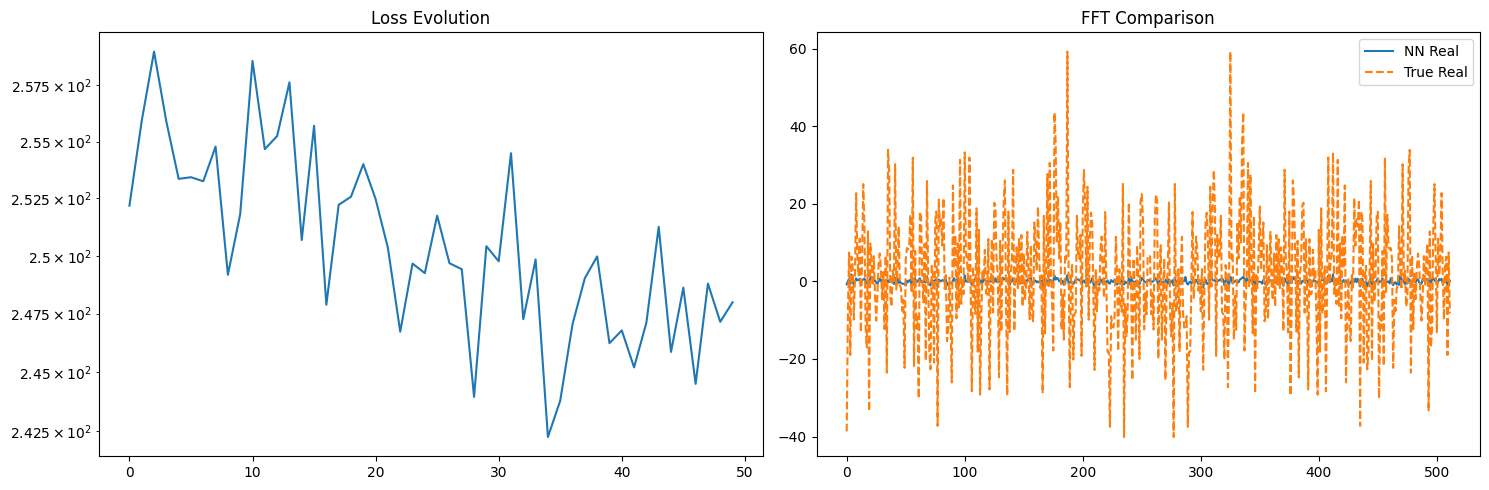

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class DFTNetwork(nn.Module):
   def __init__(self, input_size=512):
       super().__init__()
       self.layer1 = nn.Linear(input_size, input_size*2)
       self.layer2 = nn.Linear(input_size*2, input_size*2)

   def forward(self, x):
       x = self.layer1(x)
       x = torch.tanh(x)
       x = self.layer2(x)
       return x.view(x.shape[0], -1, 2)



# Two independent models
model_adam = DFTNetwork()
# Two optimizers
adam_opt = torch.optim.Adam(model_adam.parameters(), lr=1e-3)
losses_adam = []
n_epochs = 50

def generate_fft_data(batch_size=32):
    x = torch.randn(batch_size, 512)
    y = torch.fft.fft(x)
    return x, torch.stack((y.real, y.imag), dim=-1)

for epoch in range(n_epochs):
    x, y = generate_fft_data(batch_size=32)


    # Adam model on same data
    adam_opt.zero_grad()
    y_pred_adam = model_adam(x)
    loss_adam = torch.mean((y_pred_adam - y)**2)
    loss_adam.backward()
    adam_opt.step()
    losses_adam.append(loss_adam.item())
    print(f'Adam Loss: {losses_adam[-1]:.6f}')
    # Plot results

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(losses_adam)
plt.title('Loss Evolution')
plt.yscale('log')

plt.subplot(122)
with torch.no_grad():
   y_pred = model_adam(x)
plt.plot(y_pred[0,:,0].numpy(), label='NN Real')
plt.plot(y[0,:,0].numpy(), '--', label='True Real')
plt.title('FFT Comparison')
plt.legend()

plt.tight_layout()
plt.show()